In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


**EDA:**

Exploratory Data Analysis is a basic technique in data science which we need to do 80% of the time while working with real time data,so it is a initial step in data science projects.This technique includes data cleaning,Imputation Techniques,visualisations and Transformations.EDA is used to analyse and visualize the data,to treat the outliers,to handle missing values and many more,,,

Let's understand the EDA with Breast-Cancer Dataset.


**Describing the Data:**

In [3]:
df=pd.read_csv("/kaggle/input/breast-cancer-dataset/breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**Data Cleaning:**

In data cleaning we have to maintain the quality of data which includes Validity,Accuracy,completeness,consistency and uniformity.

In [6]:
#Duplicate rows
df[df.duplicated()].shape

(0, 32)

It has no duplicated rows,If we have any duplicate rows then we have to drop the row.

df.drop_duplicates()

In the same same way,If we have any duplicate column then drop the column.

df.drop('column_name',axis=1)

Type Conversion-If the column values are numeric dtype but it's showing object then we have to convert it from object to numeric using to_numeric() function.

In [7]:
#id column is not required for our analysis
df1=df.drop('id',axis=1)

In [8]:
df1.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Missing Value Imputation:**

This dataset doesn't contain any missing values,If it contains then based on the quantity and distribution of data we have to treat the missing values,this is called Missing Value Imputation.

We can remove or replace the missing values.

Replace the missing values with mean of the distribution,if it doesn't contains any outliers.

Replace the missing values with Median of the distribution,if it contains any outliers.

Replace the missing values with Mode of the distribution,if its a categorical data.

And we have some advanced techniques to replace missing values which are Regression and KNN.But most of the times we use Mean,Median and Mode only.

df1=df1.column_name.fillna(df1['column_name']mean())


<Axes: >

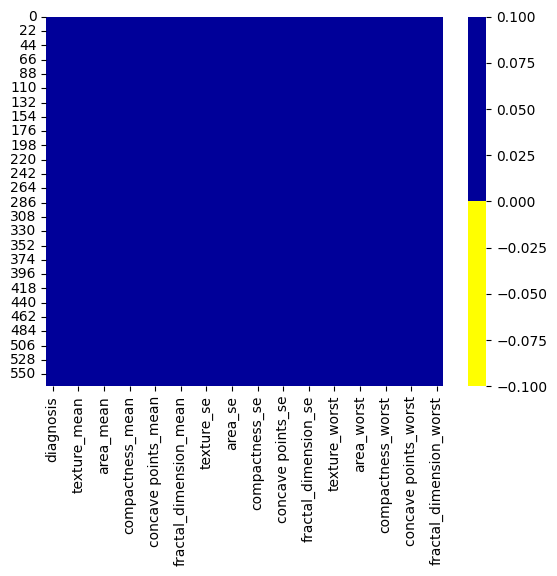

In [18]:
import seaborn as sns
cols = df1.columns
colours = ['#ffff00','#000099'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df1[cols].isnull(),
            cmap=sns.color_palette(colours))

In [9]:
df1.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Data Visualization:**

<Axes: >

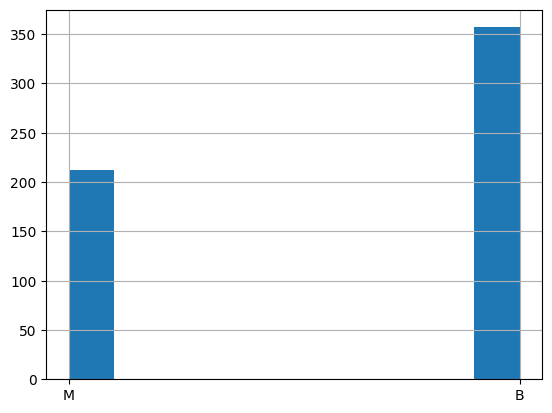

In [10]:
df1['diagnosis'].hist()

<Axes: >

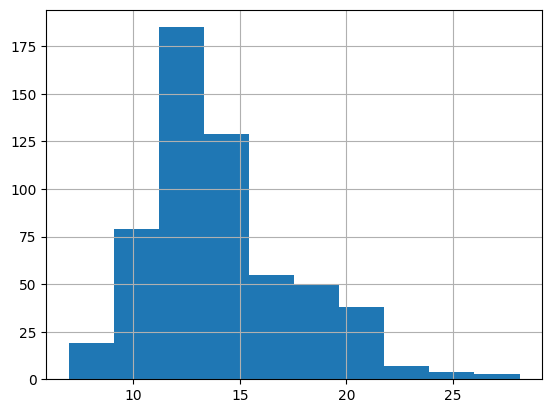

In [11]:
df1['radius_mean'].hist()

<Axes: >

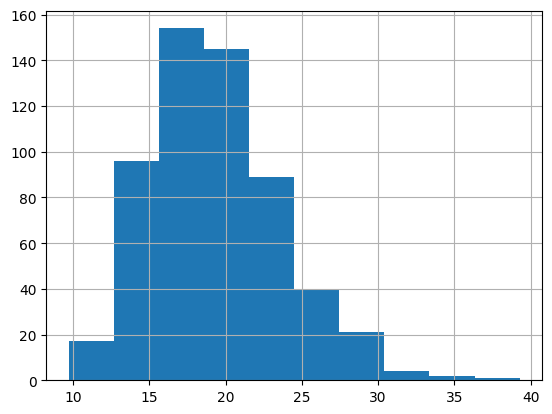

In [12]:
df1['texture_mean'].hist()

<Axes: >

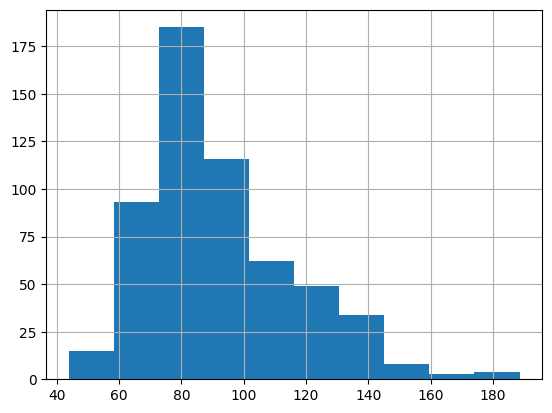

In [13]:
df1['perimeter_mean'].hist()

<Axes: >

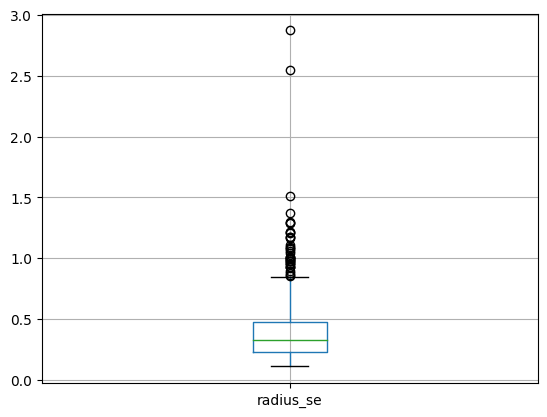

In [14]:
df1.boxplot(column=['radius_se'])

<Axes: >

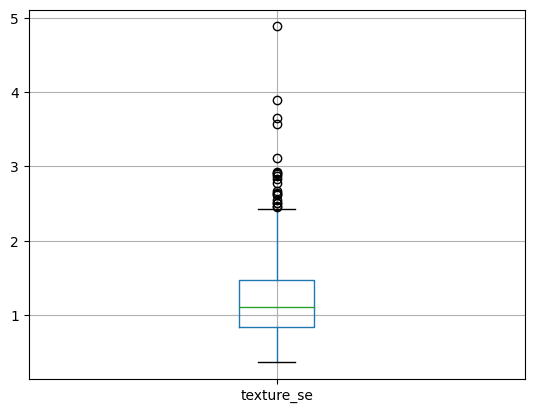

In [15]:
df1.boxplot(column=['texture_se'])

<Axes: >

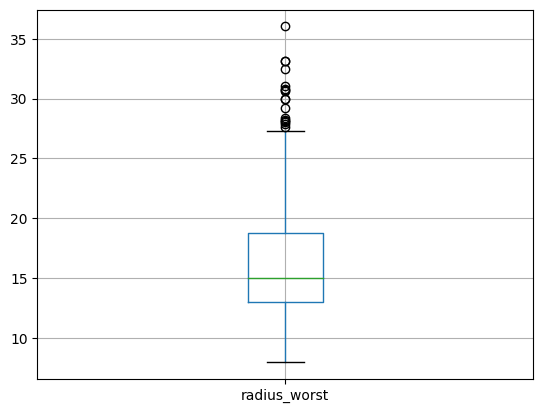

In [16]:
df1.boxplot(column=['radius_worst'])

In [21]:
df2=pd.get_dummies(df1,columns=['diagnosis'])